In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Features meaning**

Age: Age of the patient in years. \
Sex: Gender of the patient (Male or Female). \
ChestPainType: Type of chest pain experienced by the patient, categorized as Typical Angina, Atypical Angina, Non-Anginal Pain, or Asymptomatic. \
RestingBP: Resting blood pressure of the patient in mm Hg. \
Cholesterol: Serum cholesterol level of the patient in mm/dl. \
FastingBS: Fasting blood sugar level of the patient (1: if FastingBS > 120 mg/dl, 0: otherwise). \
RestingECG: Resting electrocardiogram results, categorized as Normal, ST (ST-T wave abnormality), or LVH (left ventricular hypertrophy). \
MaxHR: Maximum heart rate achieved by the patient. \
ExerciseAngina: Exercise-induced angina (chest pain) experienced by the patient (Yes or No). \
Oldpeak: ST depression induced by exercise relative to rest. \
ST_Slope: The slope of the peak exercise ST segment, categorized as Up, Flat, or Down. \
HeartDisease: Target variable indicating the presence of heart disease (1: Yes, 0: No). \
\
**Possible connections of features and heart disease:** \
\
Age: Older individuals may have a higher risk of heart disease due to factors such as cumulative exposure to risk factors and age-related physiological changes.

Sex: In male population heart disease might be more prevelent due to harmfull effects of prolonged active physical excertion.

ChestPainType: The type of chest pain experienced by patients could serve as an indicator of underlying heart conditions. Certain types of chest pain, such as typical angina or atypical angina, may be associated with a higher likelihood of heart disease.

RestingBP: Hypertension is a known risk factor for heart disease.

Cholesterol: Higher serum cholesterol levels are associated with an increased risk of atherosclerosis and coronary artery disease.

FastingBS: Elevated fasting blood sugar levels (indicative of diabetes or impaired glucose tolerance) are linked to an increased risk of heart disease.

RestingECG: Might indicate underlying cardiac abnormalities.

MaxHR: The maximum heart rate achieved during exercise may reflect the heart's ability to respond to stress and physical activity.

ExerciseAngina: Exercise-induced angina suggests inadequate blood flow to the heart during physical activity.

Oldpeak: ST depression induced by exercise relative to rest (Oldpeak) is a marker of myocardial ischemia and could indicate underlying coronary artery disease or reduced cardiac function.

ST_Slope: The slope of the peak exercise ST segment could provide information about the heart's response to stress and exercise. Abnormal ST segment changes, such as a flat or downsloping pattern, may indicate ischemia and increased risk of heart disease.

# **Check for features effect on target variable and check for missing data and outliers.**

In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [25]:
for feature in categorical_features:
    cross_tab = pd.crosstab(data[feature], data['HeartDisease'], margins=True)
    chi2, p, _, _ = chi2_contingency(cross_tab)
    display (cross_tab.style.background_gradient(cmap='plasma'))
    print(f"  Chi-squared statistic: {chi2}")
    print(f"  p-value: {p}")

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


  Chi-squared statistic: 85.64627575933622
  p-value: 1.1062441633127889e-17


HeartDisease,0,1,All
ChestPainType,,,
ASY,104,392,496
ATA,149,24,173
NAP,131,72,203
TA,26,20,46
All,410,508,918


  Chi-squared statistic: 268.06723902181767
  p-value: 2.530375262406424e-53


HeartDisease,0,1,All
FastingBS,,,
0,366,338,704
1,44,170,214
All,410,508,918


  Chi-squared statistic: 65.58612276212551
  p-value: 1.9363414162809682e-13


HeartDisease,0,1,All
RestingECG,,,
LVH,82,106,188
Normal,267,285,552
ST,61,117,178
All,410,508,918


  Chi-squared statistic: 10.93146933914098
  p-value: 0.0905176880711136


HeartDisease,0,1,All
ExerciseAngina,,,
N,355,192,547
Y,55,316,371
All,410,508,918


  Chi-squared statistic: 224.28088307154127
  p-value: 2.247206136235578e-47


HeartDisease,0,1,All
ST_Slope,,,
Down,14,49,63
Flat,79,381,460
Up,317,78,395
All,410,508,918


  Chi-squared statistic: 355.91844319207905
  p-value: 8.27530074044931e-74


In [33]:
for feature in continuous_features:
    t_stat, p_value = stats.ttest_ind(data[data['HeartDisease'] == 0][feature],
                                      data[data['HeartDisease'] == 1][feature])
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}")

    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"Number of outliers in {feature}: {len(outliers)}")

T-test for Age: t-statistic = -8.897234373161165, p-value = 3.0079532400497047e-18
Number of outliers in Age: 0
T-test for RestingBP: t-statistic = -3.275244705228324, p-value = 0.0010953145851724392
Number of outliers in RestingBP: 28
T-test for Cholesterol: t-statistic = 7.242908595426182, p-value = 9.308308883532983e-13
Number of outliers in Cholesterol: 183
T-test for MaxHR: t-statistic = 13.22548998290478, p-value = 1.1377859840278095e-36
Number of outliers in MaxHR: 2
T-test for Oldpeak: t-statistic = -13.364696790867978, p-value = 2.3907724240589574e-37
Number of outliers in Oldpeak: 16


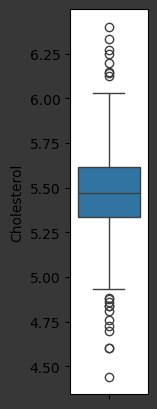

In [100]:
plt.figure(figsize=(1, 5))
sns.boxplot(y=np.log(data['Cholesterol']))
plt.show()

The most notorious ones are MaxHR, Oldpeak, ChestPainType, ExerciseAngina and ST_Slope, while all data with exception of RestingECG surpasses 0.05 threshold. There are no missing data, but alot of outliers in Cholesterol. Which means they might be important predictors of heart disease. They could be valuable for building predictive models to identify individuals at risk of heart disease.

#**Bivariate/multivariate data analysis**

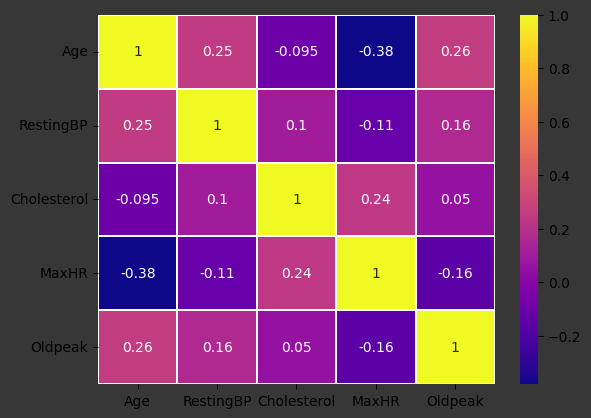

In [98]:
categorical_features.append("HeartDisease")
data_corr = data.drop(categorical_features, axis=1)

sns.heatmap(data_corr.corr(), annot=True, cmap='plasma', linewidths=0.2)
plt.rcParams['figure.facecolor'] = (0, 0, 0, 0.78)
plt.show()

# **Feature engineering suggestions**

Categorical data might be binary encoded to be further used in ML, While continuous data can be scaled for better performance. Continuous data might as well be improved by  trimming outliers. Age might be interprited as ctegorical data or be scaled exponentially, due to it's non linear effect on health.